<a href="https://colab.research.google.com/github/nfernandez97/Fuzzy_system/blob/main/Fuzzy_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Tratamiento de datos
import pandas as pd 
import numpy as np
from random import seed
from random import random

#Gráficas
import matplotlib.pyplot as plt
import seaborn as sb

#Fuzzy systems
!pip install -U scikit-fuzzy
import skfuzzy as fuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Configuración de gráficos
plt.rcParams['figure.figsize'] =(20,15)
plt.style.use('ggplot')

In [ ]:
#Importar dataset
data = pd.read_csv('/content/winequality-red.csv')

In [ ]:
#Se separa la salida del dataset en una variable aparte
y = data.quality
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [ ]:
#Se actualiza el dataset sin la columna objetivo
data = data.drop(columns = 'quality')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
#Revisión de valores nulos en el dataset
data.isna().sum().sum()

0

In [ ]:
#Análisis estadístico 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed7b5fee90>,
      dtype=object)

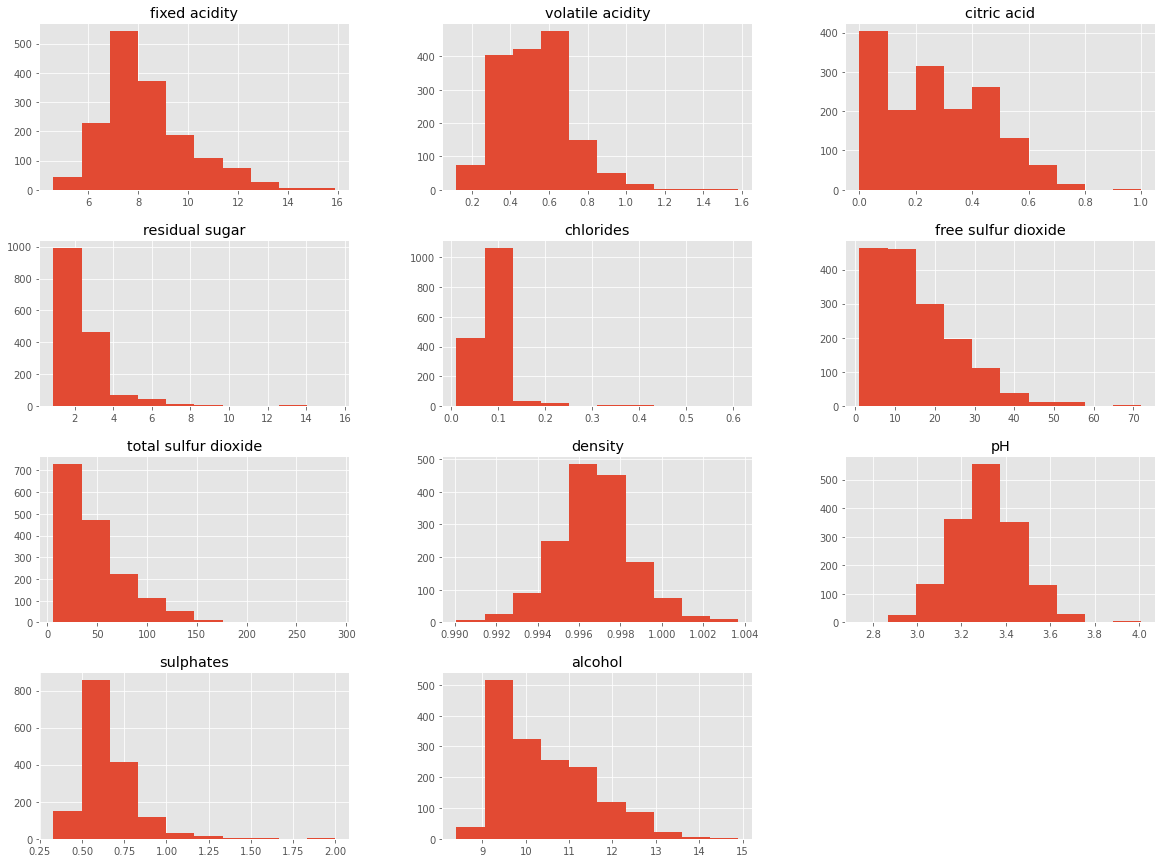

In [ ]:
data.hist() #Histogramas para ver la distribución de las variables 

In [ ]:
full_data = pd.concat([data, y], axis = 1) #Concatenamos de nuevo el los datos con la salida para realizar la matriz de correlación 
matriz_corr = full_data.corr()

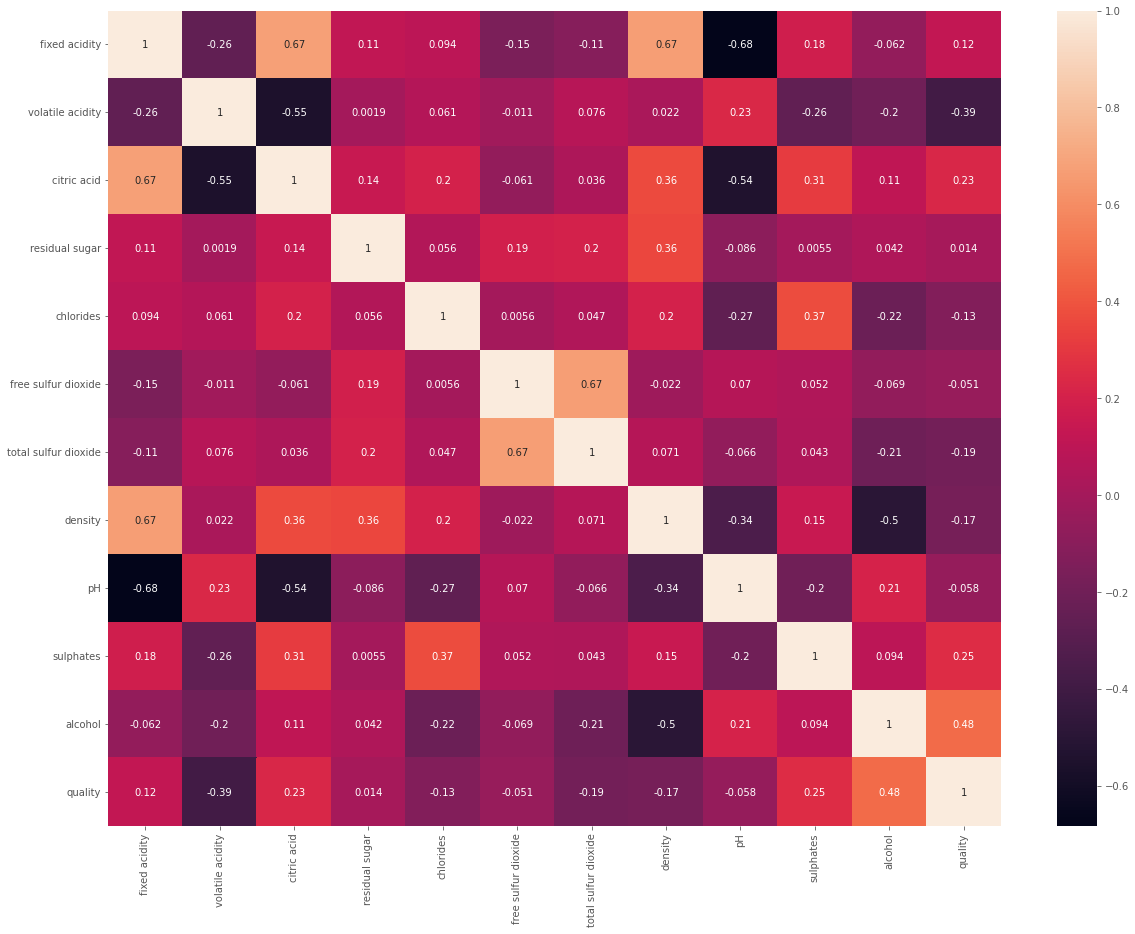

In [ ]:
#Heatmap para verificar la correlación de las variables, se tomarán las 4 variables con mayor relación
sb.heatmap(matriz_corr , annot = True)

#**Variables Elegidas**

* **Acidez volatílica:** es una medida de los ácidos grasos de bajo peso molecular (o destilables al vapor) del vino y se percibe generalmente como el olor del vinagre. 

* **Acidez cítrica:** El ácido cítrico ejerce una actividad antimicrobiana contra algunos mohos y bacterias. Puede crear una relación con los antioxidantes al quelar los iones metálicos para ayudar a prevenir el pardeamiento.

* **Sulfatos:** Los sulfatos de sodio y calcio aparecen en el agua y por lo tanto la uva y el vino pueden contenerlos. una cantidad de sulfatos inferior a 250mg/l se considera en este aspecto de calidad y con valores superiores a 400mg/l insalubre

* **Alcohol:** Es una medida del porcentaje de alcohol, el cual debido a que tiene una densidad mayor a la del agua, le proporciona cuerpo al vino.

**Vaguedad en el problema:** Al ser un problema el cual mezcla datos químicos con resultados sensoriales se presenta vaguedad a la hora de decidir un resultado basado en lo que un experto percibe con sus sentidos, ya que para diferentes personas la percepción de una misma cosa tiende a ser diferente.

**Incertidumbre epistémica:** 
  * Falta de unidades en los datos
  * Procedencia del vino (También afecta la percepción de la calidad)

Esta vaguedad e incertidumbres se atacarán inicialmente con investigación y literatura para entender un poco mejor el entorno del problema y como cada una de las variables presentes en el dataset afecta la salida del sistema. 

In [ ]:
#Eliminamos las columnas de las variables que no se utilizarán
final_data = data.drop(columns = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH'])
final_data.head() 

,volatile acidity,citric acid,sulphates,alcohol
0,0.70,0.00,0.56,9.4
1,0.88,0.00,0.68,9.8
2,0.76,0.04,0.65,9.8
3,0.28,0.56,0.58,9.8
4,0.70,0.00,0.56,9.4


#Creacion del modelo

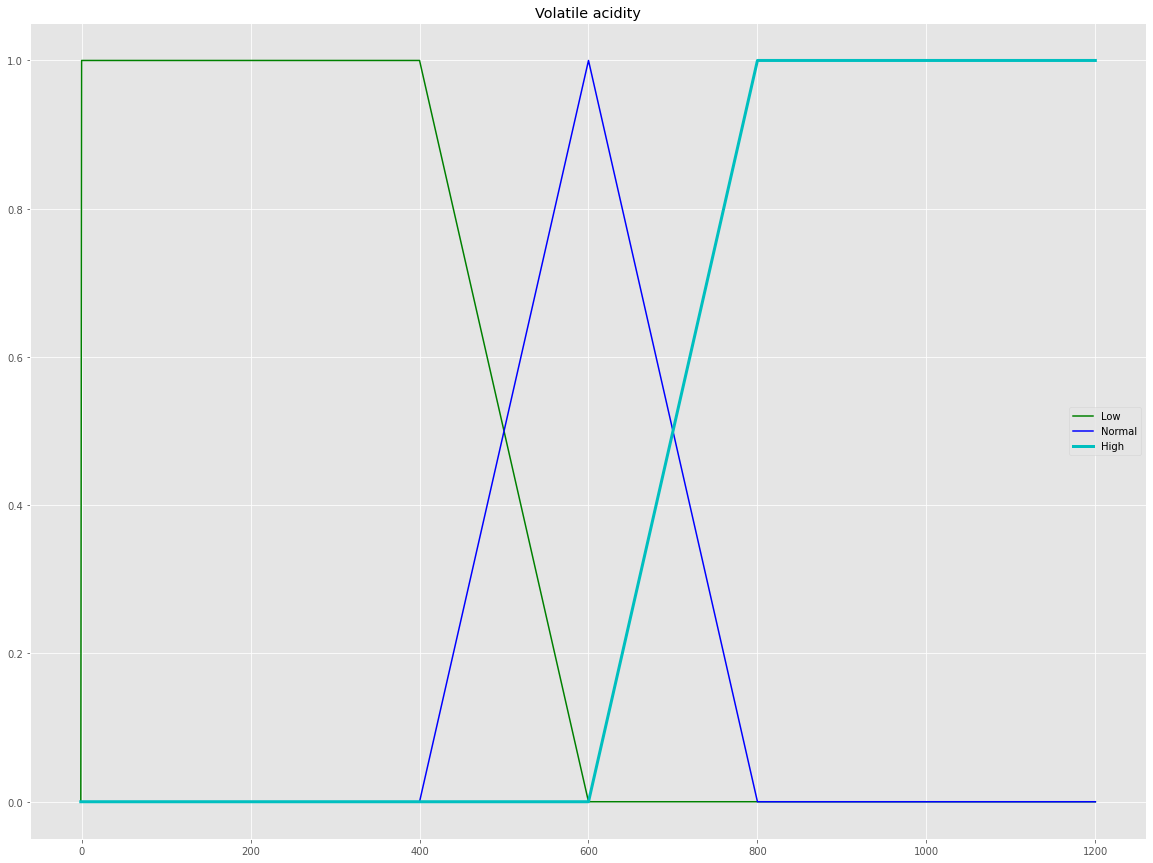

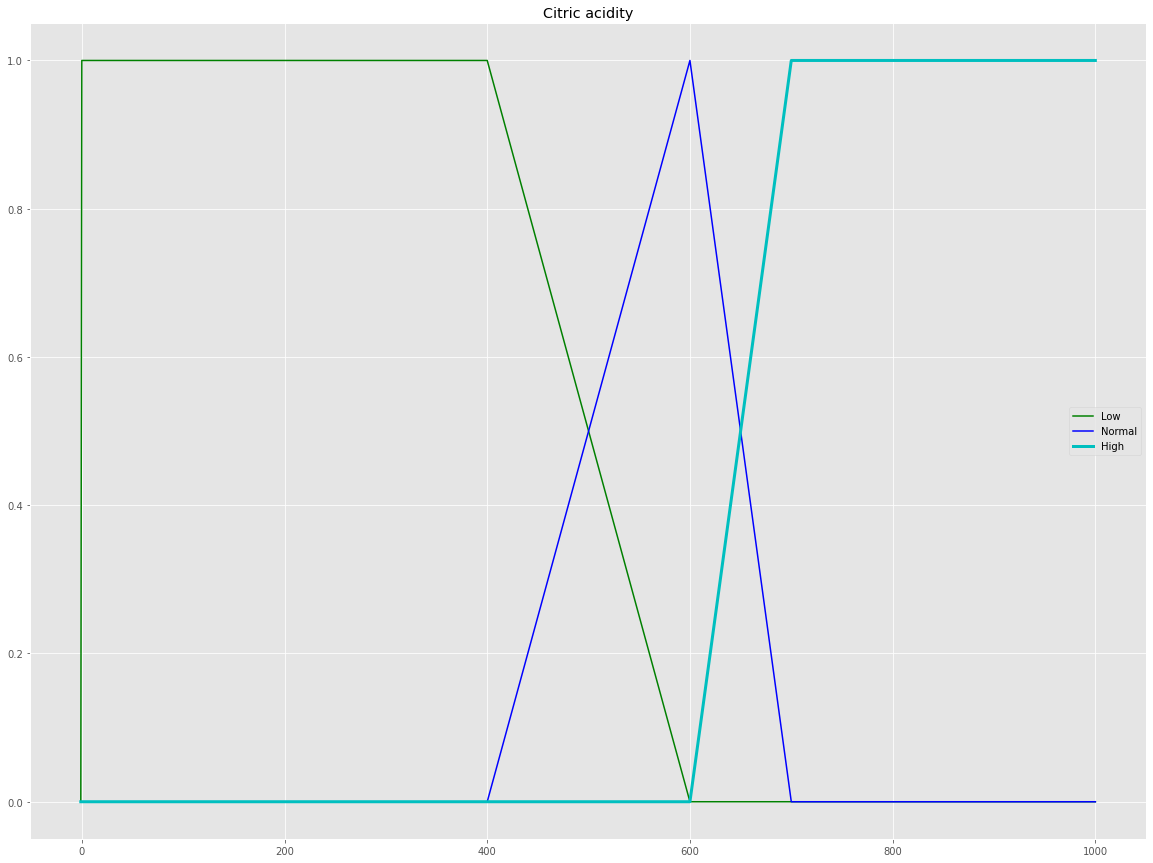

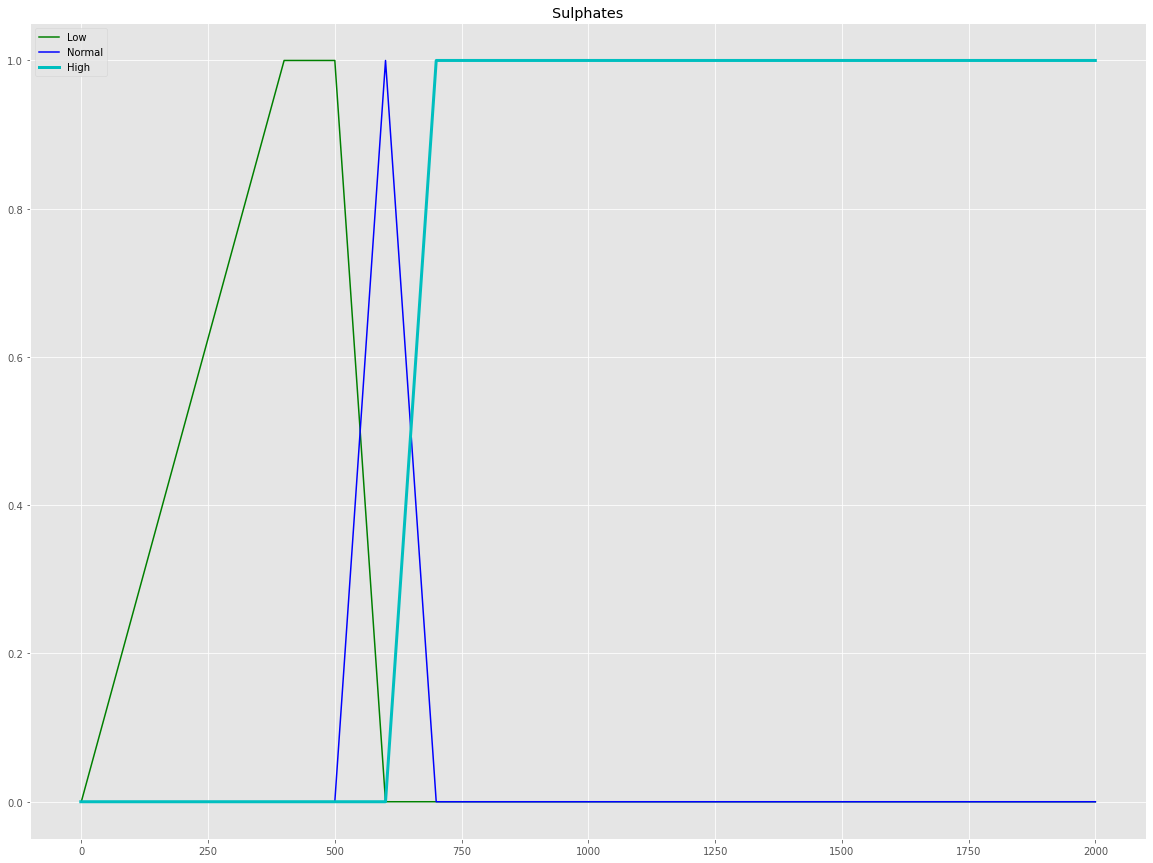

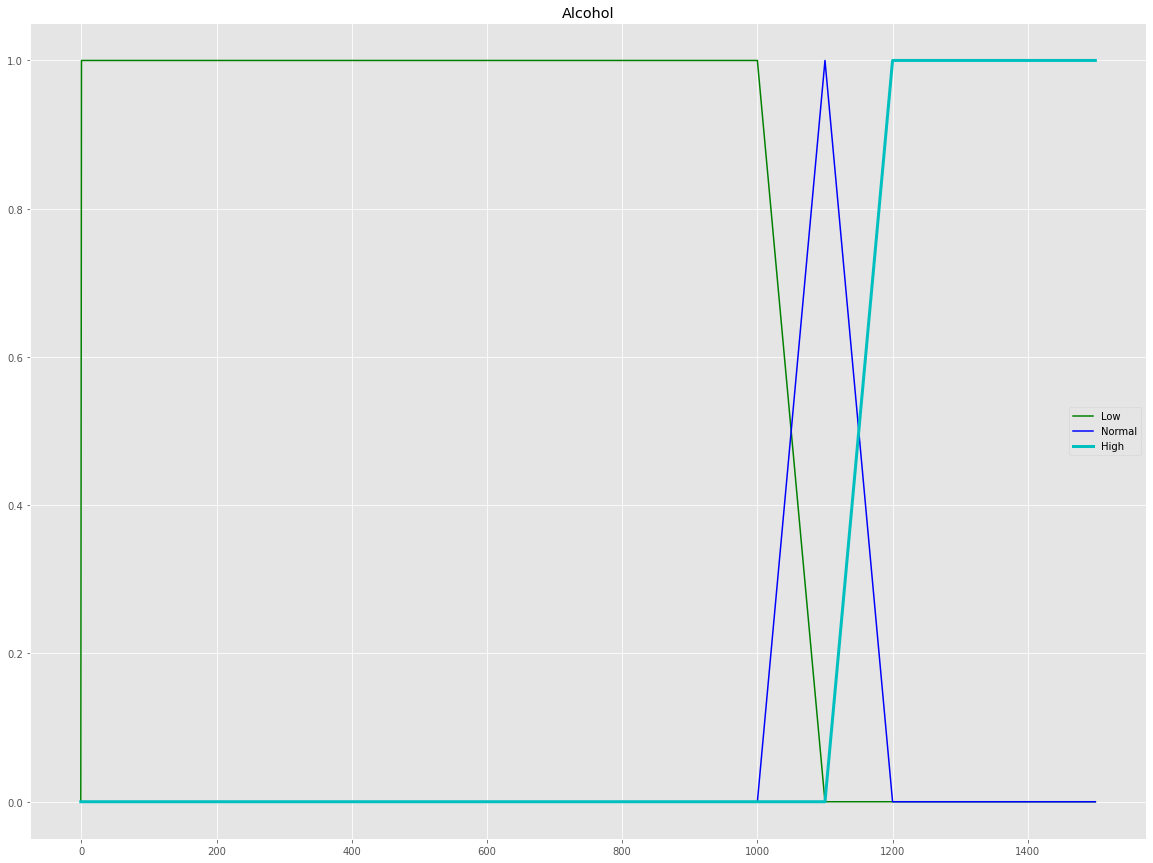

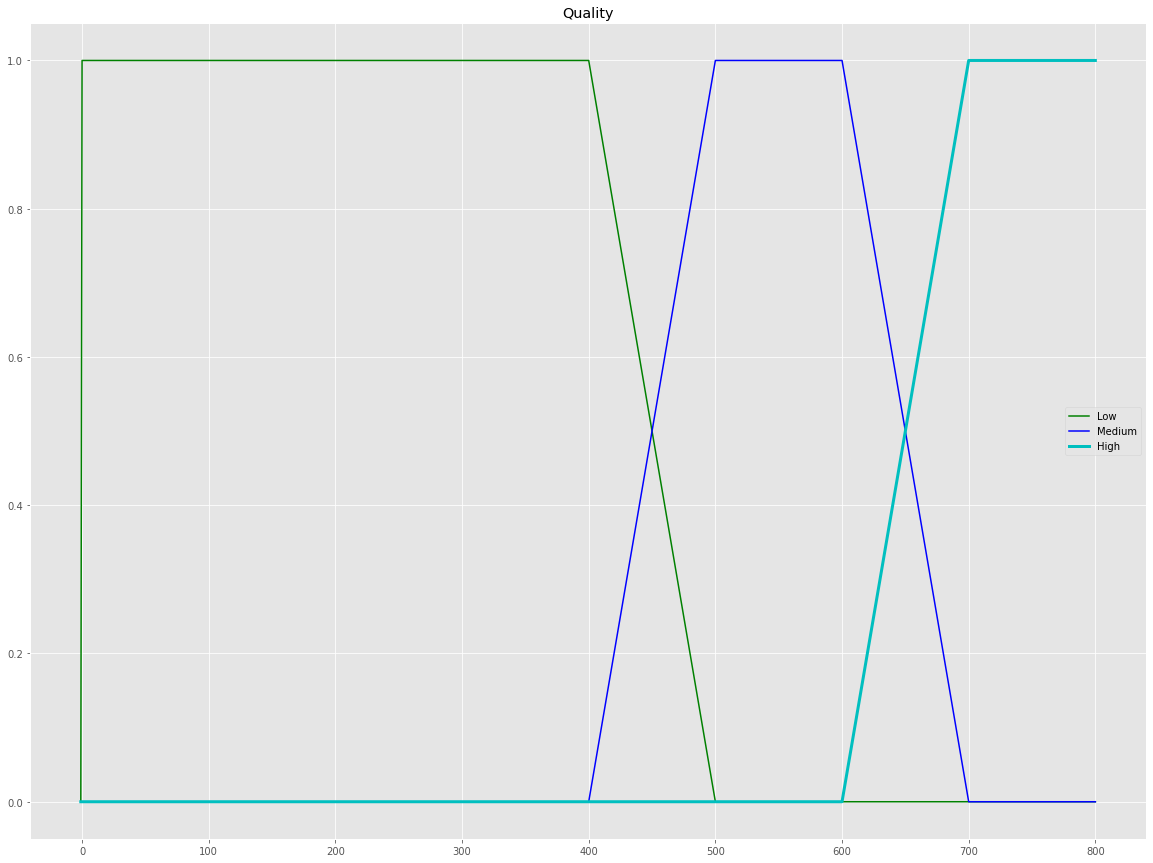

In [ ]:
# volatile acidity membership functions
mf_va = np.arange(-1, 1201, 1)
va_low = fuzz.trapmf(mf_va, [0, 0, 400, 600])
va_normal = fuzz.trimf(mf_va, [400, 600, 800])
va_high = fuzz.trapmf(mf_va, [600, 800, 1200, 1201])

# Citric acidity membership functions
mf_ca = np.arange(-1, 1001, 1)
ca_low = fuzz.trapmf(mf_ca, [0, 0, 400, 600])
ca_normal = fuzz.trimf(mf_ca, [400, 600, 700])
ca_high = fuzz.trapmf(mf_ca, [600, 700, 1001, 1001])

# Sulphates membership functions
mf_s = np.arange(-1, 2001, 1)
s_low = fuzz.trapmf(mf_s, [0, 400, 500, 600])
s_normal = fuzz.trimf(mf_s, [500, 600, 700])
s_high = fuzz.trapmf(mf_s, [600, 700, 2001, 2001])

# Alcohol membership functions
mf_al = np.arange(-1, 1501, 1)
al_low = fuzz.trapmf(mf_al, [0, 0, 1000, 1100])
al_normal = fuzz.trimf(mf_al, [1000, 1100, 1200])
al_high = fuzz.trapmf(mf_al, [1100, 1200, 1501, 1501])

# Quality membership functions 
mf_qua = np.arange(-1, 801, 1)
q_low = fuzz.trapmf(mf_qua, [0, 0, 400, 500])
q_medium = fuzz.trapmf(mf_qua, [400, 500, 600, 700])
q_high = fuzz.trapmf(mf_qua, [600, 700, 801, 801])

plt.plot(mf_va, va_low, 'g', linewidth=1.5, label='Low')
plt.plot(mf_va, va_normal, 'b', linewidth=1.5, label='Normal')
plt.plot(mf_va, va_high, 'c', linewidth=3, label='High')
plt.title('Volatile acidity')
plt.legend()
plt.show()

plt.plot(mf_ca, ca_low, 'g', linewidth=1.5, label='Low')
plt.plot(mf_ca, ca_normal, 'b', linewidth=1.5, label='Normal')
plt.plot(mf_ca, ca_high, 'c', linewidth=3, label='High')
plt.title('Citric acidity')
plt.legend()
plt.show()

plt.plot(mf_s, s_low, 'g', linewidth=1.5, label='Low')
plt.plot(mf_s, s_normal, 'b', linewidth=1.5, label='Normal')
plt.plot(mf_s, s_high, 'c', linewidth=3, label='High')
plt.title('Sulphates')
plt.legend()
plt.show()

plt.plot(mf_al, al_low, 'g', linewidth=1.5, label='Low')
plt.plot(mf_al, al_normal, 'b', linewidth=1.5, label='Normal')
plt.plot(mf_al, al_high, 'c', linewidth=3, label='High')
plt.title('Alcohol')
plt.legend()
plt.show()

plt.plot(mf_qua, q_low, 'g', linewidth=1.5, label='Low')
plt.plot(mf_qua, q_medium, 'b', linewidth=1.5, label='Medium')
plt.plot(mf_qua, q_high, 'c', linewidth=3, label='High')
plt.title('Quality')
plt.legend()
plt.show()

#Funciones de fuzzificación 

In [ ]:
def Fuzzfyva(vaVal):
# fzz_va is the level of memebership of the input value for volatile acidity for the fuzzy sets
  fzz_va = np.zeros(3)

  fzz_va[0] = fuzz.interp_membership(mf_va, va_low, vaVal)
  fzz_va[1] = fuzz.interp_membership(mf_va, va_normal, vaVal)
  fzz_va[2] = fuzz.interp_membership(mf_va, va_high, vaVal)

  return fzz_va

def Fuzzfyca(caVal):
# fzz_ca is the level of memebership of the input value for citric acidity for the fuzzy sets
  fzz_ca = np.zeros(3)

  fzz_ca[0] = fuzz.interp_membership(mf_ca, ca_low, caVal)
  fzz_ca[1] = fuzz.interp_membership(mf_ca, ca_normal, caVal)
  fzz_ca[2] = fuzz.interp_membership(mf_ca, ca_high, caVal)

  return fzz_ca

def Fuzzfys(sVal):
# fzz_s is the level of memebership of the input value for sulphates for the fuzzy sets
  fzz_s = np.zeros(3)

  fzz_s[0] = fuzz.interp_membership(mf_s, s_low, sVal)
  fzz_s[1] = fuzz.interp_membership(mf_s, s_normal, sVal)
  fzz_s[2] = fuzz.interp_membership(mf_s, s_high, sVal)

  return fzz_s  

def Fuzzfyal(alVal):
# fzz_al is the level of memebership of the input value for alcohol for the fuzzy sets
  fzz_al = np.zeros(3)

  fzz_al[0] = fuzz.interp_membership(mf_al, al_low, alVal)
  fzz_al[1] = fuzz.interp_membership(mf_al, al_normal, alVal)
  fzz_al[2] = fuzz.interp_membership(mf_al, al_high, alVal)

  return fzz_al  

#Base de conocimiento

In [ ]:
def evalRules(fuzzedVa, fuzzeds, fuzzedAl):
  # There are 27 possible rules!! Just with 3 variables to make the model less complicated

  # This variable will store the (3 in case of the quality) degrees of memebership resulting
  outVarS = np.zeros(3)

  outVarS[0] = max(outVarS[0], min(fuzzedVa[2], fuzzeds[0],fuzzedAl[0]))
  outVarS[0] = max(outVarS[0], min(fuzzedVa[2], fuzzeds[0],fuzzedAl[1]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[2], fuzzeds[0],fuzzedAl[2]))
  outVarS[0] = max(outVarS[0], min(fuzzedVa[2], fuzzeds[1],fuzzedAl[0]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[2], fuzzeds[1],fuzzedAl[1]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[2], fuzzeds[1],fuzzedAl[2]))
  outVarS[1] = max(outVarS[0], min(fuzzedVa[2], fuzzeds[2],fuzzedAl[0]))
  outVarS[0] = max(outVarS[0], min(fuzzedVa[2], fuzzeds[2],fuzzedAl[1]))
  outVarS[2] = max(outVarS[2], min(fuzzedVa[2], fuzzeds[2],fuzzedAl[2]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[1], fuzzeds[0],fuzzedAl[0]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[1], fuzzeds[0],fuzzedAl[1]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[1], fuzzeds[0],fuzzedAl[2]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[1], fuzzeds[1],fuzzedAl[0]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[1], fuzzeds[1],fuzzedAl[1]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[1], fuzzeds[1],fuzzedAl[2]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[1], fuzzeds[2],fuzzedAl[0]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[1], fuzzeds[2],fuzzedAl[1]))
  outVarS[1] = max(outVarS[1], min(fuzzedVa[1], fuzzeds[2],fuzzedAl[2]))
  outVarS[2] = max(outVarS[2], min(fuzzedVa[0], fuzzeds[0],fuzzedAl[0]))
  outVarS[2] = max(outVarS[2], min(fuzzedVa[0], fuzzeds[0],fuzzedAl[1]))
  outVarS[2] = max(outVarS[2], min(fuzzedVa[0], fuzzeds[0],fuzzedAl[2]))
  outVarS[2] = max(outVarS[2], min(fuzzedVa[0], fuzzeds[1],fuzzedAl[0]))
  outVarS[2] = max(outVarS[2], min(fuzzedVa[0], fuzzeds[1],fuzzedAl[1]))
  outVarS[2] = max(outVarS[2], min(fuzzedVa[0], fuzzeds[1],fuzzedAl[2]))
  outVarS[2] = max(outVarS[2], min(fuzzedVa[0], fuzzeds[2],fuzzedAl[0]))
  outVarS[2] = max(outVarS[2], min(fuzzedVa[0], fuzzeds[2],fuzzedAl[1]))
  outVarS[2] = max(outVarS[2], min(fuzzedVa[0], fuzzeds[2],fuzzedAl[2]))

  return outVarS

def setOutMFs(outRuleVars):
  # take the "firing" level of each output (tip) memebership functions (3 of them)
  # and create the 3 mebership functions clipped at each corresponding value.

  # A lazy way of creating the clipping level! An array of the same size as a membership function
  # with a constant avlau at said level.
  q_low_max = np.full(np.shape(mf_qua),outRuleVars[0])
  q_med_max = np.full(np.shape(mf_qua),outRuleVars[1])
  q_hig_max = np.full(np.shape(mf_qua),outRuleVars[2])

  # copy the MF from the original clipped by the level from above.
  q_out_low = np.fmin(q_low_max, q_low)
  q_out_med = np.fmin(q_med_max, q_medium)
  q_out_hig = np.fmin(q_hig_max, q_high)

  # stack the 3 MFs in a single variable to return
  t_Out_mfs = np.stack((q_out_low, q_out_med, q_out_hig))

  return t_Out_mfs

#Obteniendo combinaciones 

In [ ]:
def execFzzedRules(scoreVa, scoreS, scoreAl):

  # Fuzzyfy the 2 scores in each of its linguistic variables
  fzzedVa = Fuzzfyva(scoreVa)
  fzzedS = Fuzzfys(scoreS)
  fzzedAl = Fuzzfyal(scoreAl)

  # Evalate the rules and get the resulting degrees of membership for the output MFs
  EvaledRs = evalRules(fzzedVa, fzzedS, fzzedAl)
  outMFs = setOutMFs(EvaledRs)

  # Agregate the sets into a single one for defuzzification (i.e. get the Union {OR} of them)
  outTempMF =  fuzz.fuzzy_or(mf_qua, outMFs[0], mf_qua, outMFs[1])
  outTotalMF =  fuzz.fuzzy_or(mf_qua, outTempMF[1], mf_qua, outMFs[2])

  # defuzzify to the get crisp output value.
  fQua = fuzz.defuzz(outTotalMF[0], outTotalMF[1],'centroid')

  # plt.plot(outTotalMF[0], outTotalMF[1], 'r', linewidth=3, label='Final aggregated MFs')
  # plt.plot([fQua,fQua], [0, 1], 'g', linewidth=1.5, label='Defuzz Result')
  # plt.title('Aggregated MFs')
  # plt.legend()
  # plt.show()

  print('Quality (fuzzifying) = ', fQua/100)

  return (fQua/100)

#Evaluar el modelo

In [ ]:
data_np = final_data.to_numpy()

In [ ]:
#Evaluación de modelo con los datos del dataset
quality = []

for item in data_np: 
  
  quality.append(execFzzedRules(item[0],item[2],item[3]))

In [ ]:
#Vector de resultados que se comparará con los valores reales (y)
resultado = []

for i in range(len(quality)): 
  if round(quality[i]) == y[i]:
    resultado.append(1)
  else:
    resultado.append(0)
resultado     

In [ ]:
#Cálculo de la precisión del modelo
precision = (resultado.count(1)/len(resultado))*100
print(f'La precisión del modelo es del {precision} %')

La precisión del modelo es del 12.445278298936834 %


#Conclusiones

* Al elegir 3 variables para describir el modelo, es mas complejo elegir un set de reglas lo suficientemente robusto para no ingresarle ruido al sistema. 
* Al hacer la fuzzificación inicial de las variables se pudo haber elegido una fuzzificacion con más intervalos para abarcar mas datos en mas combinaciones de resultados. 
